<a href="https://colab.research.google.com/github/rivkms/2021_sw_exam/blob/main/30204%EA%B0%95%EB%AF%BC%EC%84%B1_4%EC%A3%BC%EC%B0%A8_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%B6%84%EB%A5%981(%EA%B3%BC%EC%A0%9C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4주차 ML1 Classification 실습 과제
- 과제를 완성하여 클래스룸에 기한내에 제출합니다.
- 머신러닝 프로세스(데이터 수집 -> 데이터 전처리 -> 모델 학습 -> 모델 예측 및 평가)대로 실습을 진행합니다.
- 모델을 완성한 후, '5.모델 분석'에서 자신의 모델을 분석한 결과를 작성합니다.


## 1.데이터 수집
- 캐글의 데이터 API를 이용하여 Red Wine Quality 데이터를 로드하세요.(https://www.kaggle.com/kosovanolexandr/decision-tree-90-62-red-wine-quality)

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (1).json


In [ ]:
!kaggle datasets download -d uciml/red-wine-quality-cortez-et-al-2009

  0% 0.00/25.6k [00:00<?, ?B/s]
100% 25.6k/25.6k [00:00<00:00, 9.80MB/s]


In [ ]:
!unzip red-wine-quality-cortez-et-al-2009.zip
!ls

Archive:  red-wine-quality-cortez-et-al-2009.zip
  inflating: winequality-red.csv     
kaggle.json				sample_data
red-wine-quality-cortez-et-al-2009.zip	winequality-red.csv


- pandas의 데이터프레임 'data' 변수를 선언하여 csv 파일 형태의 데이터를  저장하세요.

In [ ]:
import numpy as np
import pandas as pd

# csv 파일을 pandas dataframe으로 읽기
data = pd.read_csv('winequality-red.csv')

# 상위 5개 행 출력
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 2.데이터 전처리

- data.shape(), data.info(), data.describe() 등을 통하여 데이터의 형태를 확인하고 NA(None, Null, Nan) 값이 있는 열이 있는지 확인하세요.

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
data.shape

(1599, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


- 결측치 등 삭제/대체가 필요한 행/열이 있다면 처리하세요.

- 클래스별("quality" 컬럼)로 균등한 분포를 지니는지 시각화하여 확인하세요.

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

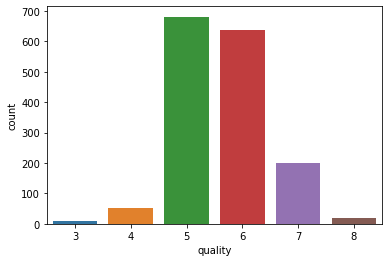

In [ ]:
import seaborn as sns
%matplotlib inline

sns.countplot(data=data, x="quality")
data.loc[:,'quality'].value_counts()

현재 위 그래프를 보았을 떄 3, 4, 8의 경우 굉장히 작은 양의 데이터가, 5, 6 에는 많은 양의 데이터가 많다는 것을 볼 수 있고 이를 통하여 데이터가 편중되어 있다는 것을 알 수 있다. 

- 머신러닝 학습을 위해 피처 데이터 세트 x, 레이블 데이터 세트 y를 추출하세요.
레드 와인 품질을 분류하는 것이 목적이므로 'quality' 컬럼을 y에 대입합니다.

In [ ]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

- train set과 test set을 적절한 비율로 나누세요.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 156, stratify=y)

In [ ]:
x_train.head()
y_train.head()

1421    5
1190    6
159     6
769     5
1122    6
Name: quality, dtype: int64

## 3.모델 학습
- DecisionTreeClassifier 객체를 생성하고, 모델 학습을 수행하세요.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Decision Tree Classification
dt = DecisionTreeClassifier()

dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## 4.모델 예측 및 평가
- test set을 모델에 주입하여 예측 정확도를 확인하세요.

In [ ]:
# 예측값 확인
pred = dt.predict(x_test)
type(pred)
pred[:5]

array([5, 4, 6, 8, 6])

In [ ]:
from sklearn.metrics import accuracy_score

# 정확도 출력
accuracy_score(y_test, pred)

0.6125

## 5.모델 분석
- 모델의 문제점은? :
 - 1 . 데이터의 정확도가 0.6125%, 정확도가 낮다고 할 수 있다. 
 - 2 . 세팅을 default로 함으로서 기본 세팅으로만 모델을 형성하였다. 
- 모델의 개선 가능성은? : 여러 세팅들을 변화시키면서(예를 들어 결정트리의 여러 세팅들에 변화를 주는 등) 모델을 변화시키면서 정확도를 상승 시킬 수 있을것이라 생각이 된다. 